In [2]:
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

In [19]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))

predictors2 = load_data('pred_baseline_pwlt.csv')
print(list(predictors2))

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']
['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'constant']


In [45]:
#uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all.csv')
uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')


#uccle_des['date'] =  pd.to_datetime(uccle_des['date'],
                             # format='%Y-%m')
#uccle_des.set_index('date', inplace=True)
uccle[0:5]

,date,0km,1km,2km,3km,4km,5km,6km,7km,8km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
0,1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1,1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
2,1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
3,1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
4,1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965


In [46]:
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)
uccle[0:5]

,0km,1km,2km,3km,4km,5km,6km,7km,8km,9km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
date,,,,,,,,,,,,,,,,,,,,,
1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,2.618,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,5.592,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,2.819,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,1.599,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,5.461,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965


In [47]:
uccle_time = uccle.loc['1977-02-01':'2017-06-01']
#uccle_time['5km'][uccle['5km']>0]

In [48]:
predictors, uccle_time = pd.DataFrame.align(predictors, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values
print('X', len(X))

# (nsamples) array of observations
Y = uccle_time['5km_ds'].values
print('Y',len(Y))

regression_output = mzm_regression(X, Y)

X 485
Y 485


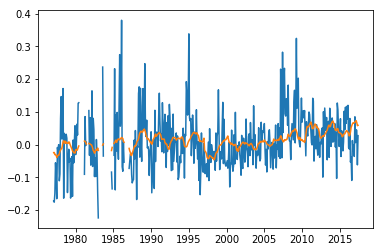

In [49]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output['fit_values'])



In [44]:
param_list = dict(zip(list(predictors), regression_output['gls_results'].params))
param_list

{'enso': 0.004586852303616921,
 'trop': 0.0002660864053706675,
 'solar': 0.005136146892507749,
 'qboA': -0.022601845173821133,
 'qboB': -0.016026289857121324,
 'aod': 0.014561178382790543,
 'linear_pre': -0.022323153871580056,
 'linear_post': 0.02247684288753028,
 'pre_const': -0.02770482989127513,
 'post_const': -0.0071881502685814305,
 'gap_cons': -0.0026441696658098526}

In [32]:
print(list(predictors))

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


In [33]:
predictors2, uccle_time = pd.DataFrame.align(predictors2, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors2.values
print('X', len(X))

# (nsamples) array of observations
Y2 = uccle_time['5km_ds'].values
print('Y',len(Y))

regression_output2 = mzm_regression(X2, Y2)

X 485
Y 485


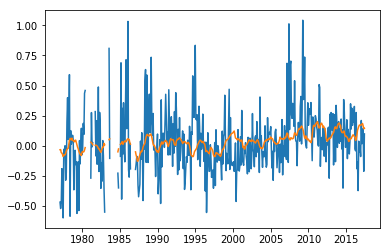

In [34]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output2['fit_values'])

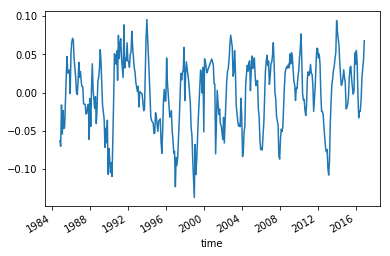

In [51]:
s2_omps_osiris = tests.load_example_data('S2_OSIRIS_OMPS_alt_nd_sample.csv')


plt.figure()
s2_omps_osiris['relative_anomaly'].plot()


In [52]:
s2_omps_osiris

,anomaly,relative_anomaly,std,relative_std,count
time,,,,,
1984-11-01,-1.961263e+11,-0.062956,8.508778e+10,0.027313,50.000000
1984-12-01,-2.189834e+11,-0.070293,1.092995e+11,0.035085,12.000000
1985-01-01,-5.061310e+10,-0.016247,1.347999e+11,0.043271,55.000000
1985-02-01,-1.688418e+11,-0.054198,1.716337e+11,0.055094,29.000000
1985-03-01,-7.358094e+10,-0.023619,1.383903e+11,0.044423,18.000000
1985-04-01,-1.466243e+11,-0.047066,1.771280e+11,0.056858,22.000000
1985-05-01,-1.398474e+11,-0.044891,1.457235e+11,0.046777,47.000000
1985-07-01,6.253538e+10,0.020074,1.057644e+11,0.033950,58.000000
1985-08-01,1.470100e+11,0.047190,7.127822e+10,0.022880,17.000000


In [41]:
predictors2, s2_omps_osiris = pd.DataFrame.align(predictors2, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors.values

# (nsamples) array of observations
Y2 = s2_omps_osiris['relative_anomaly'].values

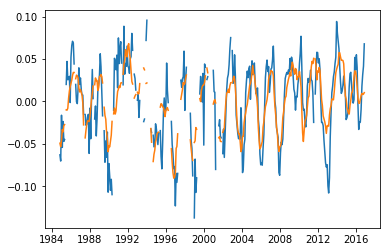

In [42]:
regression_output2 = mzm_regression(X2, Y2)

plt.figure()
plt.plot(s2_omps_osiris.index, Y2)

plt.plot(s2_omps_osiris.index, regression_output2['fit_values'])

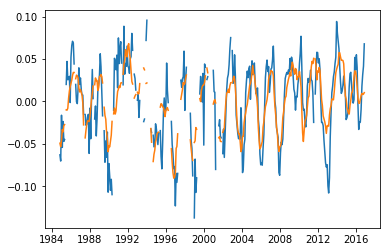

In [43]:
predictors, s2_omps_osiris = pd.DataFrame.align(predictors, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values

# (nsamples) array of observations
Y = s2_omps_osiris['relative_anomaly'].values

regression_output = mzm_regression(X, Y)

plt.figure()
plt.plot(s2_omps_osiris.index, Y)

plt.plot(s2_omps_osiris.index, regression_output['fit_values'])